In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
customerDF = pd.read_csv('C:/Users/kanika2/Advance Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
productionDF =  pd.read_csv('C:/Users/kanika2/Advance Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
TransactionsDF =  pd.read_csv('C:/Users/kanika2/Advance Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

In [8]:
transProdDF =  TransactionsDF.merge(productionDF,how = 'left', left_on = 'prod_cat_code', right_on='prod_cat_code')

In [9]:
custTransProdDF =  customerDF.merge(transProdDF, how = 'left', left_on = 'customer_Id', right_on = 'cust_id' )

# 2. Prepare a summary report for the merged data set.


# a. Get the column names and their corresponding data types

In [10]:
custTransProdDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
customer_Id          99434 non-null int64
DOB                  99434 non-null object
Gender               99394 non-null object
city_code            99398 non-null float64
transaction_id       99293 non-null float64
cust_id              99293 non-null float64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null float64
prod_cat_code        99293 non-null float64
Qty                  99293 non-null float64
Rate                 99293 non-null float64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null float64
prod_subcat          99293 non-null object
dtypes: float64(10), int64(1), object(6)
memory usage: 13.7+ MB


In [11]:
custTransProdDF.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id       float64
cust_id              float64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code    float64
prod_subcat           object
dtype: object

# b. Top/Bottom 10 observations

In [12]:
custTransProdDF.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12.0,Academic
2,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10.0,Non-Fiction
3,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11.0,Children
4,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3.0,Comics
5,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,6.0,DIY
6,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,1.0,Mens
7,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,4.0,Women
8,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,1.0,Mens
9,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,4.0,Women


In [9]:
custTransProdDF.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99424,274308,29-12-1992,F,5.0,2.620869e+10,274308.0,22-10-2012,1.0,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,4.0,Kids
99425,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,1.0,Mens
99426,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,3.0,Women
99427,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,5/9/2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,4.0,Kids
99428,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,7.0,Fiction
99429,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,12.0,Academic
99430,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,10.0,Non-Fiction
99431,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,11.0,Children
99432,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,3.0,Comics
99433,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,4/7/2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,6.0,DIY


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [13]:
def fiveNumberSummary(x):
    return pd.Series([x.min(),x.quantile(0.25),x.median(),x.quantile(0.75),x.max()],
                 index = ['MIN','Q1','MEDIAN','Q3','MAX'])

In [14]:
custTransProdDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
customer_Id          99434 non-null int64
DOB                  99434 non-null object
Gender               99394 non-null object
city_code            99398 non-null float64
transaction_id       99293 non-null float64
cust_id              99293 non-null float64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null float64
prod_cat_code        99293 non-null float64
Qty                  99293 non-null float64
Rate                 99293 non-null float64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null float64
prod_subcat          99293 non-null object
dtypes: float64(10), int64(1), object(6)
memory usage: 13.7+ MB


In [12]:
custTransProdDF.select_dtypes(include ='float64').apply( fiveNumberSummary )

,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
MIN,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
Q1,3.0,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.280,762.450,4.0
MEDIAN,5.0,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.920,1761.370,7.0
Q3,8.0,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,366.975,3585.725,10.0
MAX,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


In [15]:
custTransProdDF

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12.0,Academic
2,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10.0,Non-Fiction
3,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11.0,Children
4,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3.0,Comics
5,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,6.0,DIY
6,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,1.0,Mens
7,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,4.0,Women
8,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,1.0,Mens
9,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,4.0,Women


# d. Frequency tables for all the categorical variables

In [18]:
custTransProdDF.loc[: , ['Gender','city_code','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_sub_cat_code','prod_subcat']].describe()

,city_code,prod_subcat_code,prod_cat_code,prod_sub_cat_code
count,99398.000000,99293.000000,99293.000000,99293.000000
mean,5.466700,6.796894,4.003243,6.806985
std,2.859436,3.609439,1.563991,3.615952
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,4.000000
50%,5.000000,7.000000,5.000000,7.000000
75%,8.000000,10.000000,5.000000,10.000000
max,10.000000,12.000000,6.000000,12.000000


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

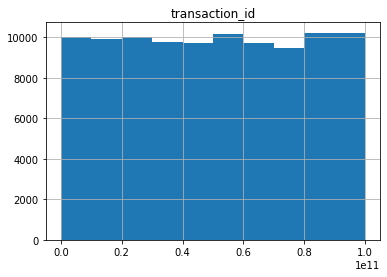

<Figure size 1080x360 with 0 Axes>

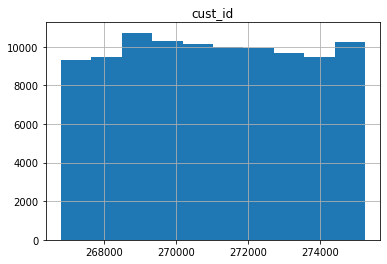

<Figure size 1080x360 with 0 Axes>

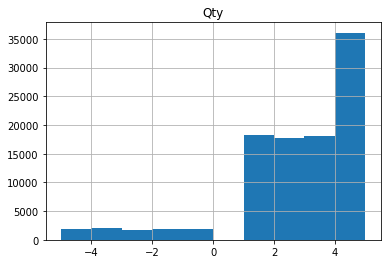

<Figure size 1080x360 with 0 Axes>

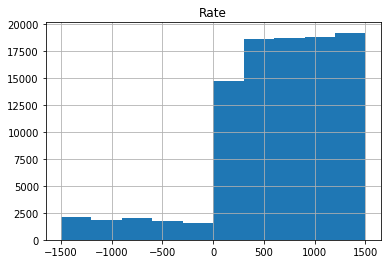

<Figure size 1080x360 with 0 Axes>

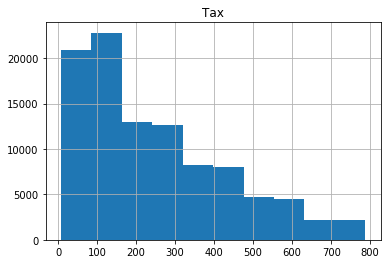

<Figure size 1080x360 with 0 Axes>

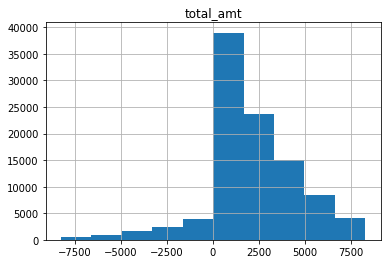

<Figure size 1080x360 with 0 Axes>

In [17]:
continueData = custTransProdDF[['transaction_id','cust_id','Qty','Rate','Tax','total_amt']]
for x in continueData :
    continueData[x].hist()
    plt.title(x)
    plt.figure(figsize = (15,5))   
    plt.show()

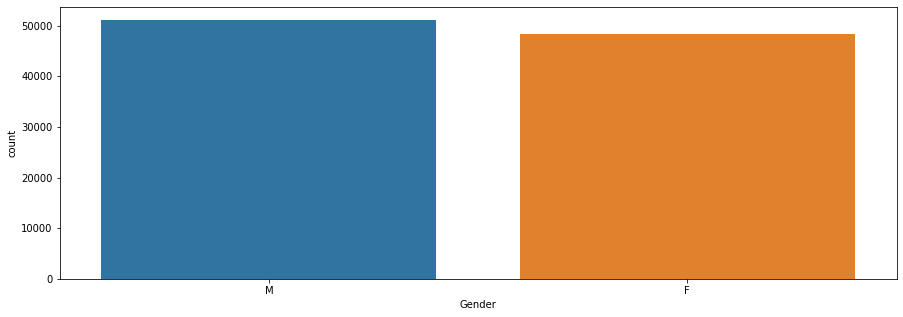

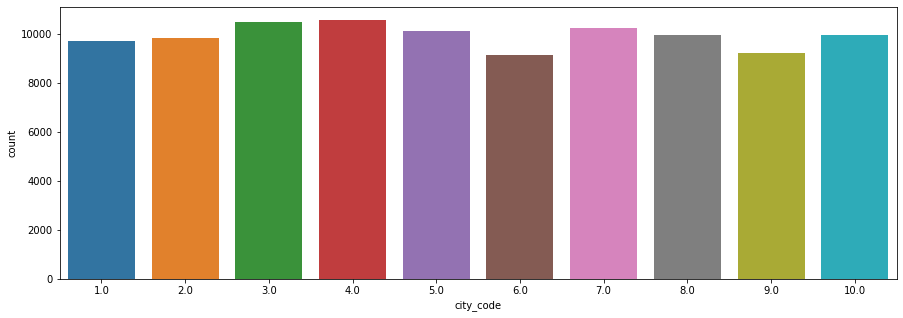

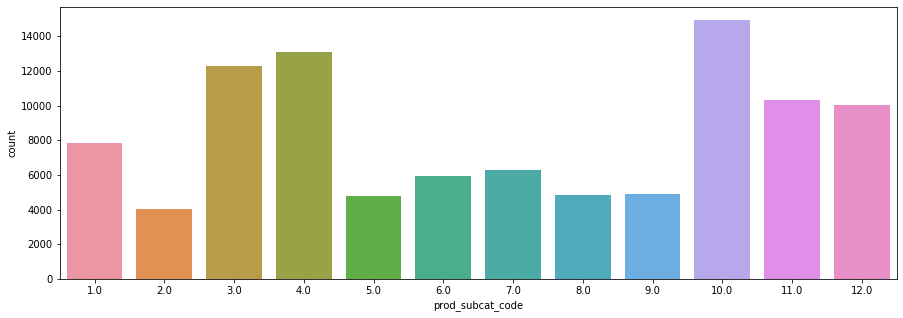

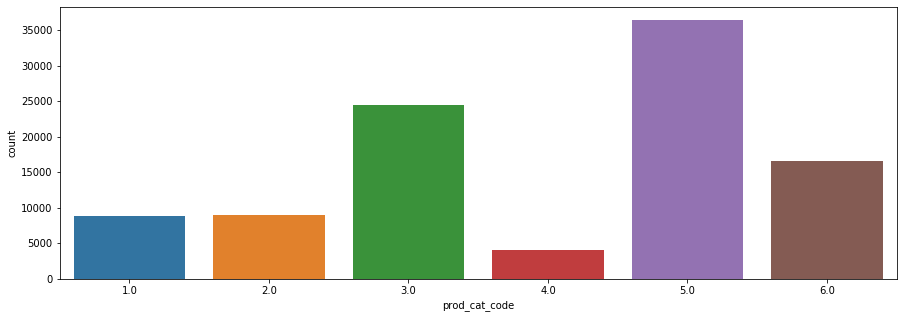

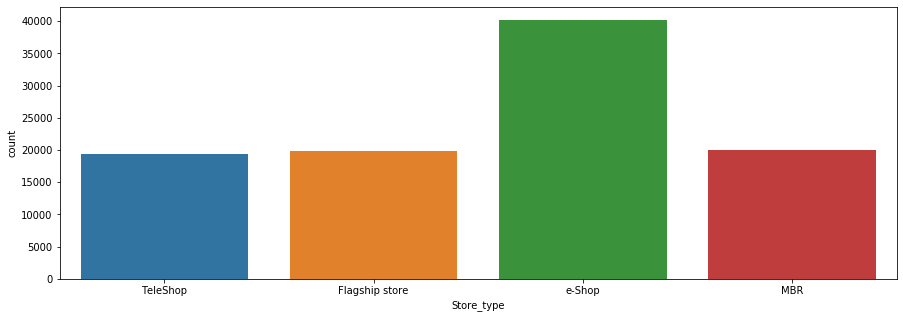

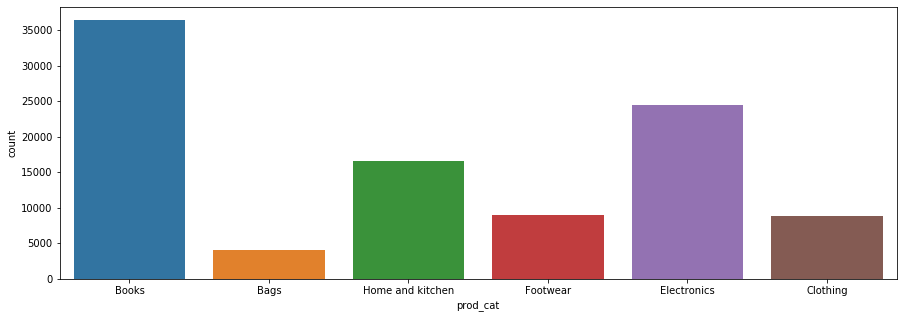

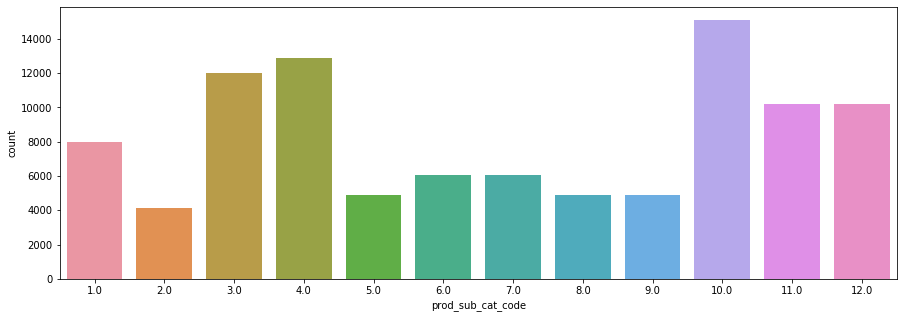

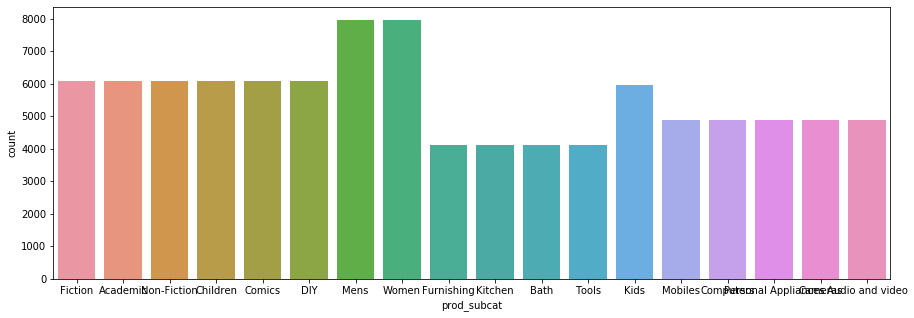

In [19]:
categoricalData = custTransProdDF[['Gender','city_code','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_sub_cat_code','prod_subcat']]
for x in categoricalData :
    plt.figure(figsize = (15,5))
    sns.countplot(categoricalData[x])
    plt.xlabel(x)
    plt.show()

# 4. Calculate the following information using the merged dataset :

# a. Time period of the available transaction data

In [22]:
custTransProdDF['tran_date'] = pd.to_datetime(custTransProdDF['tran_date'])

In [23]:
maxRange = custTransProdDF['tran_date'].max().strftime('%Y-%m-%d')
minRange = custTransProdDF['tran_date'].min().strftime('%Y-%m-%d')
maxRange

'2014-12-02'

In [24]:
minRange

'2011-01-02'

In [25]:
totalDays = custTransProdDF['tran_date'].max() - custTransProdDF['tran_date'].min()

In [26]:
print('Transaction start and end time' + 'start from ' + minRange + ' & ends on ' + maxRange)

Transaction start and end timestart from 2011-01-02 & ends on 2014-12-02


# b. Count of transactions where the total amount of transaction was negative

In [27]:
custTransProdDF[(custTransProdDF['total_amt'] < 0)]['transaction_id'].count()

9294

# 5. Analyze which product categories are more popular among females vs male customers.|

In [28]:
popularCategoryDF = custTransProdDF.groupby(['Gender','prod_cat'])['prod_cat_code'].count().reset_index().sort_values(by = 'prod_cat_code', ascending = False)

In [29]:
popularCategoryDF

,Gender,prod_cat,prod_cat_code
7,M,Books,18696
1,F,Books,17694
9,M,Electronics,12850
3,F,Electronics,11640
11,M,Home and kitchen,8536
5,F,Home and kitchen,7976
4,F,Footwear,4587
8,M,Clothing,4554
10,M,Footwear,4407
2,F,Clothing,4317


In [30]:
popularCategoryDF.groupby('prod_cat')['prod_cat_code'].sum().reset_index().sort_values(by='prod_cat_code',ascending = False).head(1)

,prod_cat,prod_cat_code
1,Books,36390


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [31]:
def customerDataSummary(x):
    return pd.Series([round(x.max(),2),round(x.isna().sum() * 100/x.isna().count(),2)],
                 index = ['MAX','percentile'])

In [32]:
custTransProdDF.groupby('city_code')['cust_id'].apply(customerDataSummary)

city_code            
1.0        MAX           275250.00
           percentile         0.16
2.0        MAX           275249.00
           percentile         0.18
3.0        MAX           275265.00
           percentile         0.18
4.0        MAX           275264.00
           percentile         0.12
5.0        MAX           275257.00
           percentile         0.16
6.0        MAX           275252.00
           percentile         0.11
7.0        MAX           275206.00
           percentile         0.12
8.0        MAX           275244.00
           percentile         0.11
9.0        MAX           275216.00
           percentile         0.15
10.0       MAX           275262.00
           percentile         0.12
Name: cust_id, dtype: float64

# 7. Which store type sells the maximum products by value and by quantity?

In [33]:
maxByQty_ValueDF = custTransProdDF.groupby('Store_type')['Rate','Qty'].apply(lambda x:x.count()).sort_values(by = ['Rate','Qty'], ascending = False)

In [34]:
maxByQty_ValueDF.head(1)

,Rate,Qty
Store_type,,
e-Shop,40185,40185


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [35]:
custTransProdDF[(custTransProdDF['Store_type'] == 'Flagship store') & ((custTransProdDF['prod_cat'] == 'Electronics') | (custTransProdDF['prod_cat'] == 'Clothing'))]['total_amt'].sum()

14658949.89

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [36]:
custTransProdDF[(custTransProdDF['Gender'] == 'M') & (custTransProdDF['prod_cat'] == 'Electronics')]['total_amt'].sum()

28515547.125

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [37]:
CustomerWiseTransactionDataDF =  custTransProdDF[custTransProdDF['total_amt'] > 0].groupby(by = 'customer_Id')['transaction_id'].nunique().reset_index()

In [38]:
CustomerWiseTransactionDataDF[CustomerWiseTransactionDataDF['transaction_id'] > 10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


# 11. For all customers aged between 25 - 35, find out: 
a. What was the total amount spent for “Electronics” and “Books” product categories?

In [43]:
from datetime import date
import math
today = date.today()
totalDays = 365.24
def getAgeFromDOB(dob):
    ageInDays =  pd.to_datetime(date.today()) - pd.to_datetime(dob)
    age = math.ceil(ageInDays.days/totalDays)
    return age

In [48]:
custTransProdDF['Age'] = custTransProdDF['DOB'].apply(getAgeFromDOB)

In [45]:
round(custTransProdDF[((custTransProdDF['Age'] > 25) & (custTransProdDF['Age'] < 35) ) & ((custTransProdDF['prod_cat'] == 'Books') | (custTransProdDF['prod_cat'] == 'Electronics'))]['total_amt'].sum(),2)

35959763.06

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [49]:
startDate = '2014-01-01'
endDate = '2014-03-01'
custTransProdDF[((custTransProdDF['Age'] > 25) & (custTransProdDF['Age'] < 35) ) & ((custTransProdDF['tran_date'] > startDate) & (custTransProdDF['tran_date'] < endDate))]['total_amt'].sum()

1713563.2800000003